# NAME : Krishna
# Task No : 2
# Task : Prediction using unsupervised learning


In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\Others\ML\iris.csv",index_col=0)

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


In [5]:
print(df["Species"].value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


In [6]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


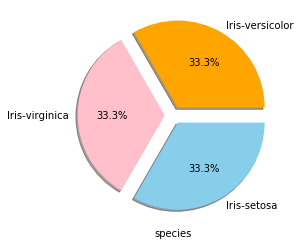

In [7]:
a= df['Species'].value_counts()
plt.pie(a.values, labels=a.index,shadow=True,colors=['orange','pink','skyblue'],explode = (0.1,0.1,0.1), autopct='%1.1f%%')
plt.xlabel('species')
plt.show()

In [8]:
#x = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]


In [9]:
x = df.iloc[:, [0, 1, 2, 3]].values


In [10]:
avg_of_squared_dist = []
sum_of_squared_dist = []

for i in range(1,11):
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(x)
    n = x.shape[0]
    avg_of_squared_distance = (sum(np.min(cdist(x, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / n)
    #print(avg_of_squared_distance)
    avg_of_squared_dist.append(avg_of_squared_distance)
    sum_of_squared_dist.append(kmeanModel.inertia_)


In [11]:
print(len(avg_of_squared_dist))

10


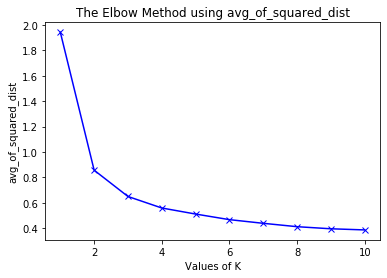

In [12]:
plt.plot(range(1,11), avg_of_squared_dist, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('avg_of_squared_dist')
plt.title('The Elbow Method using avg_of_squared_dist')
plt.show()

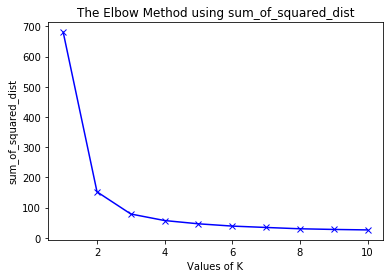

In [13]:
plt.plot(range(1,11), sum_of_squared_dist, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('sum_of_squared_dist')
plt.title('The Elbow Method using sum_of_squared_dist')
plt.show()

In [14]:
# finalising k = 3
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

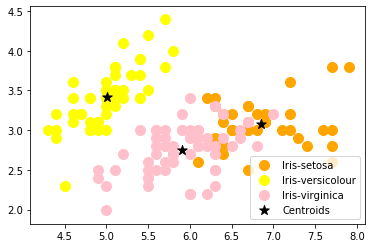

In [16]:
clusters = kmeanModel.fit_predict(x)

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1],
            s = 100, c = 'pink', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeanModel.cluster_centers_[:, 0], kmeanModel.cluster_centers_[:,1], 
            s = 100,marker='*',color='black', label = 'Centroids')

plt.legend()